In [1]:
## Programming Quantum Computers
##   by Eric Johnston, Nic Harrigan and Mercedes Gimeno-Segovia
##   O'Reilly Media
##
## More samples like this can be found at http://oreilly-qc.github.io

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
## Uncomment the next line to see diagrams when running in a notebook
#%matplotlib inline

## Example 3-4: Swap Test
# Set up the program
input1 = QuantumRegister(1, name='input1')
input2 = QuantumRegister(1, name='input2')
output = QuantumRegister(1, name='output')
output_c = ClassicalRegister(1, name='outputc')
qc = QuantumCircuit(input1, input2, output, output_c)

qc.h(output)
qc.cswap(output, input1, input2)
qc.h(output)
qc.x(output)
qc.measure(output, output_c)

counts: {'1': 1}
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.-0.j 0.+0.j 0.+0.j 0.+0.j]


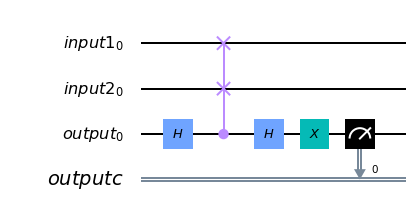

In [3]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

counts = result.get_counts(qc)
print('counts:',counts)

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw(output='mpl',justify='all')          # draw the circuit